### LSTM for predicting a time series
###  Edgar Acuna
#### Adapted from https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/
#### February 2022
#### Dataset: Sunspots

In [64]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [65]:
#Loading the data
#url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = read_csv('https://academic.uprm.edu/eacuna/sunspots.csv', usecols=[1], engine='python')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  2820 non-null   float64
dtypes: float64(1)
memory usage: 22.2 KB


In [67]:
#Normalizing the data
data = np.array(df.values.astype('float32'))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()
n = len(data)
#Creating train (80% percent) and test data (20 %) 
split_percent=.8
split = int(n*split_percent)
train_data = data[range(split)]
test_data = data[split:]

In [68]:
print(train_data.shape)

(2256,)


In [69]:
print(data.shape)
print(test_data.shape)

(2820,)
(564,)


In [70]:
time_steps = 12
Y_ind = np.arange(time_steps, len(train_data), time_steps)
trainY = train_data[Y_ind]
rows_x = len(trainY)
#print(rows_x)
trainX = train_data[range(time_steps*rows_x)]
#print(trainX.shape)
trainX = np.reshape(trainX, (rows_x, time_steps, 1))  
print(trainX.shape)
Y1_ind = np.arange(time_steps, len(test_data), time_steps)
testY = test_data[Y1_ind]
rows_x1 = len(testY)
#print(rows_x1)
testX = test_data[range(time_steps*rows_x1)]
#print(testX.shape)
testX = np.reshape(testX, (rows_x1, time_steps, 1))  
print(testX.shape)

(187, 12, 1)
(46, 12, 1)


In [71]:
time_steps=12
n_features=1
hidden_units=20
model = Sequential()
model.add(LSTM(hidden_units, activation='relu', input_shape=(time_steps, n_features)))
model.add(Dense(n_features))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


#### The number of parametres in the LSTM model are 10,451 

In [72]:
model.fit(trainX, trainY, epochs=20, verbose=2)

Epoch 1/20
6/6 - 0s - loss: 0.0611
Epoch 2/20
6/6 - 0s - loss: 0.0557
Epoch 3/20
6/6 - 0s - loss: 0.0509
Epoch 4/20
6/6 - 0s - loss: 0.0470
Epoch 5/20
6/6 - 0s - loss: 0.0433
Epoch 6/20
6/6 - 0s - loss: 0.0400
Epoch 7/20
6/6 - 0s - loss: 0.0365
Epoch 8/20
6/6 - 0s - loss: 0.0326
Epoch 9/20
6/6 - 0s - loss: 0.0282
Epoch 10/20
6/6 - 0s - loss: 0.0237
Epoch 11/20
6/6 - 0s - loss: 0.0187
Epoch 12/20
6/6 - 0s - loss: 0.0154
Epoch 13/20
6/6 - 0s - loss: 0.0124
Epoch 14/20
6/6 - 0s - loss: 0.0104
Epoch 15/20
6/6 - 0s - loss: 0.0084
Epoch 16/20
6/6 - 0s - loss: 0.0067
Epoch 17/20
6/6 - 0s - loss: 0.0056
Epoch 18/20
6/6 - 0s - loss: 0.0050
Epoch 19/20
6/6 - 0s - loss: 0.0049
Epoch 20/20
6/6 - 0s - loss: 0.0049


In [73]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [74]:
# Error of predictions
train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))    

Train RMSE: 0.069 RMSE
Test RMSE: 0.108 RMSE


In [75]:
# Function to Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

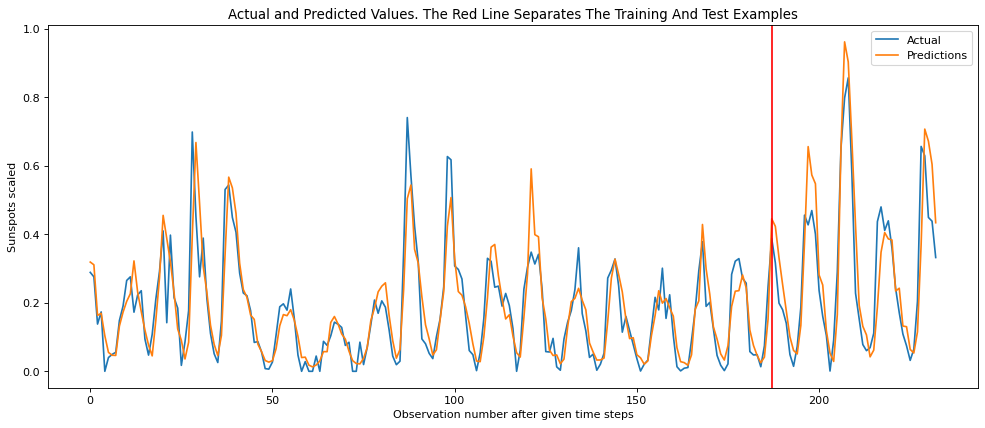

In [76]:
#Ploting results
plot_result(trainY, testY, train_predict, test_predict)